In [1]:
import random
import nltk
from nltk.corpus import words

all_words = words.words()

# 랜덤 단어 생성
def generate_random_words(number_of_words):
    random_words = random.choices(all_words, k=number_of_words)
    return ''.join(random_words)


In [2]:
import random

def transposition_encrypt(sentence, batch):
    # 작업단위 = batch -> 문장을 batch의 배수 길이로 만듦
    while len(sentence) % batch != 0:
        sentence += 'z'

    # 랜덤키 생성
    key = list(range(1, batch + 1))
    random.shuffle(key)
    
    # batch개의 글자 단위로 문장을 쪼갬
    texts = [sentence[i:i+batch] for i in range(0, len(sentence), batch)]
    
    # 쪼갠 덩어리 각각에서 문자들을 key에 맞게 재배열 = 열의 순서 변경
    encrypted_texts = []
    for text in texts:
        encrypted_text = ''.join([text[i-1] for i in key])
        encrypted_texts.append(encrypted_text)
    
    # 변경된 덩어리들을 다시 합쳐서 문장화
    encrypted_sentence = ''.join(encrypted_texts)
    return encrypted_sentence


In [3]:
import itertools

# 복호화시에 words.txt를 단어 데이터베이스로 사용
possible_words = set()
with open('words.txt', 'r', encoding='utf-8') as file:
    for line in file:
        possible_words.add(line.strip())

# 단어 분리 함수
def split_words(sentence, start, result):
    
    # start 인덱스가 문장 마지막 글자의 인덱스를 넘은 경우 -> 직전의 루프가 마지막 글자를 포함시킨 단어를 찾았음을 의미
    if start == len(sentence):
        return True #작업을 마치기 위한 True 반환
    
    for end in range(start + 1, len(sentence) + 1):

        # 단일 알파벳은 단어로 취급하지 않도록 하며, 문장 중 일부가 단어 목록에 존재하면 result에 추가
        if len(sentence[start:end]) > 1 and sentence[start:end] in possible_words:
            result.append(sentence[start:end])
            
            # 나머지 부분도 단어로 성공적으로 분리할 수 있는지 확인
            if split_words(sentence, end, result):
                return True
            else:
                result.pop()  # 나머지를 단어로 분리할 수 없는 경우, 결과에서 제거하고 다른 옵션 시도
    
    # 현재 남은 글자들에서는 그 어떤 단어도 분리시킬 수 없던 경우 False 리턴
    return False

# 단어 분리 함수를 이용해 문장이 단어들로 이루어져 있는지 검사하고 결과를 반환하는 함수
def check_words(sentence):
    result = []
    if split_words(sentence, 0, result):
        return ' '.join(result)
    else:
        return None

def transposition_decrypt(encrypted_sentence, batch):
    valid_decrypted_sentences = []  # 유효한 복호화된 문장 후보들을 저장할 리스트

    # 지정된 batch 크기에 대해 가능한 모든 키에 대해 시도
    for key in itertools.permutations(range(batch)):
        decrypted_texts = []
        
        # encrypted_sentence를 batch개의 글자 단위로 문장을 쪼갬
        for i in range(0, len(encrypted_sentence), batch):
            text = encrypted_sentence[i:i+batch]

            # 쪼갠 덩어리 각각에서 문자들을 key에 맞게 재배열
            decrypted_text = ''.join(text[j] for j in key)
            decrypted_texts.append(decrypted_text)
        
        # 복호화된 문장 후보 생성
        decrypted_sentence = ''.join(decrypted_texts)

        # 단어 추출 및 검증
        verified_sentence = check_words(decrypted_sentence)
        if verified_sentence:
            valid_decrypted_sentences.append(verified_sentence)
        # 만약 유효하지 않다면, 'z'를 제거한 후 다시 검사
        else:
            # 마지막 문자가 'z'인 경우에만 제거하고 검사
            if decrypted_sentence.endswith('z'):
                trimmed_sentence = decrypted_sentence.rstrip('z')
                verified_trimmed_sentence = check_words(trimmed_sentence)
                if verified_trimmed_sentence:
                    valid_decrypted_sentences.append(verified_trimmed_sentence)

    return valid_decrypted_sentences


In [4]:
import pandas as pd
import time

batch_and_time_data = []  # 결과를 저장할 리스트

for batch in range(3, 10):  # batch 값이 3에서 9까지 반복
    total_time = 0
    
    for _ in range(100):

        start_time = time.time()
        
        sentence = generate_random_words(10)
        print(f'생성된 문장: {sentence}')

        # 암호화
        encrypted_sentence = transposition_encrypt(sentence, batch)
        print(f'암호화된 문장: {encrypted_sentence}')

        # 복호화
        decrypted_sentences = transposition_decrypt(encrypted_sentence, batch)
        if decrypted_sentences:
            print(f'복호화된 유효 문장: \n{decrypted_sentences}')
        else:
            print("복호화된 문장 후보들 중 유효한 문장이 검출되지 않았습니다.")
            
        total_time += time.time() - start_time
        print('---------------------------------------------------------\n')
    
    average_time = total_time / 100
    batch_and_time_data.append([batch, average_time])


df = pd.DataFrame(batch_and_time_data, columns=['작업 단위(batch)', '평균 소요 시간(초)'])
df.to_excel('transposition_times.xlsx', index=False)

for batch, time in batch_and_time_data:
    print(f'작업 단위: {batch}, 평균 실행 시간: {time}초')


생성된 문장: lichenographicligeanceImpennesnamelessErasmusChouanresiduumpieridapiculturaltrichostrongyle
암호화된 문장: ilcehngorpahcilgienacIemepnensanmleessEarsumshCoaunersdiumupeirdiaipclutruatlrcihsotornyglzez
복호화된 유효 문장: 
['lichenographic lige ance Impennes name less Erasmus Chou an residuum pierid apicultural trichostrongyle']
---------------------------------------------------------

생성된 문장: zygapophysisephemerantransplendentlydickhawkbitproplasmodontophoremoolsoversweetpancreatoduodenectomy
암호화된 문장: yzgpaohpyisspehmeearnrtasnpelnednltyidchkakwbtiporpalsomdnotpohroeomosloevrwsetepnaceraotdoudneetcoymz
복호화된 문장 후보들 중 유효한 문장이 검출되지 않았습니다.
---------------------------------------------------------

생성된 문장: Ionipedigraicresistorformaldehydeepicyclicreverablecartmanbasidigitalephonismcomitatensian
암호화된 문장: onIpeiigdairrecissortorfalmehddeypieycciclevrraelebarcmatbanidsgiialtpheniomcsmioattnseani
복호화된 유효 문장: 
['Ioni pedigraic res ist or form aldehyde epi cycl ic rever abl ecart manba sidi git ale p

<h2>결과분석</h2>

   작업 단위(batch)  평균 소요 시간(초)
0             3     0.005383
1             4     0.011600
2             5     0.027324
3             6     0.088539
4             7     0.542966
5             8     4.047372
6             9    36.082535


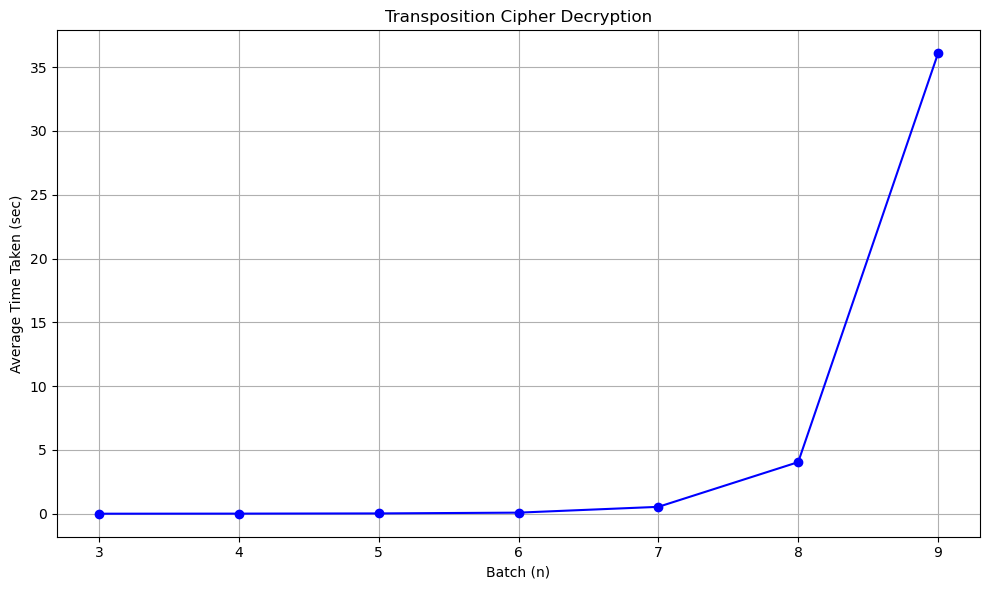

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('transposition_times.xlsx')

print(df)

plt.figure(figsize=(10, 6))
plt.plot(df['작업 단위(batch)'], df['평균 소요 시간(초)'], marker='o', linestyle='-', color='b')

plt.title('Transposition Cipher Decryption')
plt.xlabel('Batch (n)')
plt.ylabel('Average Time Taken (sec)')
plt.grid(True)
plt.xticks(df['작업 단위(batch)'])
plt.tight_layout()
plt.show()


<h2>첫단어를 힌트로 제공하는 경우</h2>

In [6]:
import random
import nltk
from nltk.corpus import words

all_words = words.words()

# 랜덤 단어 생성
def generate_random_words(number_of_words, include_first_word=True):
    random_words = random.choices(all_words, k=number_of_words)
    if include_first_word:
        first_word = random.choice(all_words)
        return first_word, ''.join([first_word] + random_words)
    else:
        return ''.join(random_words)



In [7]:
import random

def transposition_encrypt(sentence, batch):
    # 작업단위 = batch -> 문장을 batch의 배수 길이로 만듦
    while len(sentence) % batch != 0:
        sentence += 'z'

    # 랜덤키 생성
    key = list(range(1, batch + 1))
    random.shuffle(key)
    
    # batch개의 글자 단위로 문장을 쪼갬
    texts = [sentence[i:i+batch] for i in range(0, len(sentence), batch)]
    
    # 쪼갠 덩어리 각각에서 문자들을 key에 맞게 재배열 = 열의 순서 변경
    encrypted_texts = []
    for text in texts:
        encrypted_text = ''.join([text[i-1] for i in key])
        encrypted_texts.append(encrypted_text)
    
    # 변경된 덩어리들을 다시 합쳐서 문장화
    encrypted_sentence = ''.join(encrypted_texts)
    return encrypted_sentence


In [8]:
import itertools

# 복호화시에 words.txt를 단어 데이터베이스로 사용
possible_words = set()
with open('words.txt', 'r', encoding='utf-8') as file:
    for line in file:
        possible_words.add(line.strip())

# 단어 분리 함수
def split_words(sentence, start, result):
    
    # start 인덱스가 문장 마지막 글자의 인덱스를 넘은 경우 -> 직전의 루프가 마지막 글자를 포함시킨 단어를 찾았음을 의미
    if start == len(sentence):
        return True #작업을 마치기 위한 True 반환
    
    for end in range(start + 1, len(sentence) + 1):

        # 단일 알파벳은 단어로 취급하지 않도록 하며, 문장 중 일부가 단어 목록에 존재하면 result에 추가
        if len(sentence[start:end]) > 1 and sentence[start:end] in possible_words:
            result.append(sentence[start:end])
            
            # 나머지 부분도 단어로 성공적으로 분리할 수 있는지 확인
            if split_words(sentence, end, result):
                return True
            else:
                result.pop()  # 나머지를 단어로 분리할 수 없는 경우, 결과에서 제거하고 다른 옵션 시도
    
    # 현재 남은 글자들에서는 그 어떤 단어도 분리시킬 수 없던 경우 False 리턴
    return False

# 단어 분리 함수를 이용해 문장이 단어들로 이루어져 있는지 검사하고 결과를 반환하는 함수
def check_words(sentence):
    result = []
    if split_words(sentence, 0, result):
        return ' '.join(result)
    else:
        return None

def transposition_decrypt(encrypted_sentence, batch, first_word):
    pre_valid_sentences = []
    valid_decrypted_sentences = []  # 유효한 복호화된 문장 후보들을 저장할 리스트
    
    # 지정된 batch 크기에 대해 가능한 모든 키에 대해 시도
    for key in itertools.permutations(range(batch)):
        
        decrypted_texts = []
        
        # encrypted_sentence를 batch개의 글자 단위로 문장을 쪼갬
        for i in range(0, len(encrypted_sentence), batch):
            text = encrypted_sentence[i:i+batch]
            
            # 쪼갠 덩어리 각각에서 문자들을 key에 맞게 재배열
            decrypted_text = ''.join(text[j] for j in key)
            decrypted_texts.append(decrypted_text)
            
        # 복호화된 문장 후보 생성
        decrypted_sentence = ''.join(decrypted_texts)
        
        # 첫 단어로 시작하는 문장만을 유효한 후보로 고려
        if decrypted_sentence.startswith(first_word):
            pre_valid_sentences.append(decrypted_sentence)
            
    # 첫 단계에서 수집된 문장 후보들이 2개 이상일 경우에만, 각 문장에 대한 단어 분리 및 검증 과정 수행
    if len(pre_valid_sentences) > 1:
        for sentence in pre_valid_sentences:
            verified_sentence = check_words(sentence)
            if verified_sentence:
                valid_decrypted_sentences.append(verified_sentence)
    else:
        valid_decrypted_sentences = pre_valid_sentences
    
    return valid_decrypted_sentences



In [9]:
import pandas as pd
import time

batch_and_time_data = []  # 결과를 저장할 리스트

for batch in range(3, 10):  # batch 값이 3에서 9까지 반복
    total_time = 0
    
    for _ in range(100):

        start_time = time.time()
        
        first_word, sentence = generate_random_words(10, include_first_word=True)
        print(f'생성된 문장: {sentence}')

        # 암호화
        encrypted_sentence = transposition_encrypt(sentence, batch)
        print(f'암호화된 문장: {encrypted_sentence}')

        # 복호화
        decrypted_sentences = transposition_decrypt(encrypted_sentence, batch, first_word)

        if decrypted_sentences:
            print(f'복호화된 유효 문장: \n{decrypted_sentences}')
        else:
            print("복호화된 문장 후보들 중 유효한 문장이 검출되지 않았습니다.")
            
        total_time += time.time() - start_time
        print('---------------------------------------------------------\n')
    
    average_time = total_time / 100
    batch_and_time_data.append([batch, average_time])


df = pd.DataFrame(batch_and_time_data, columns=['작업 단위(batch)', '평균 소요 시간(초)'])
df.to_excel('transposition_times_with_hint.xlsx', index=False)

for batch, time in batch_and_time_data:
    print(f'작업 단위: {batch}, 평균 실행 시간: {time}초')


생성된 문장: untrippablesnailystintedlyribonucleicradiovisionprovidestoriologicalpompholyxMelanochroiincalescencypseudomilitarist
암호화된 문장: untrippablesnailystintedlyribonucleicradiovisionprovidestoriologicalpompholyxMelanochroiincalescencypseudomilitaristz
복호화된 유효 문장: 
['untrippablesnailystintedlyribonucleicradiovisionprovidestoriologicalpompholyxMelanochroiincalescencypseudomilitaristz']
---------------------------------------------------------

생성된 문장: intertragianProgymnasiumneuropterousturbinatemuttonbirdeagernesssmoothlygatekeeperimagistghostlifyimpious
암호화된 문장: tintergraniaoPrmgysnamiuuneprortesourtunbieattmuntorbiadergesnemsstooyhltgaeekeepmriiaggstshoitlifyimpsou
복호화된 유효 문장: 
['intertragianProgymnasiumneuropterousturbinatemuttonbirdeagernesssmoothlygatekeeperimagistghostlifyimpious']
---------------------------------------------------------

생성된 문장: percentalrequiemcatelectrotonusGetsuldemosadventuresomelywoodenheadredivivehackingdisadjustsyllabism
암호화된 문장: erpencalteqrieucameltcteo

<h2>결과분석 - 첫 단어가 힌트로 주어지는 경우</h2>

   작업 단위(batch)  평균 소요 시간(초)
0             3     0.000290
1             4     0.001984
2             5     0.003681
3             6     0.028667
4             7     0.102837
5             8     0.727764
6             9     6.280824


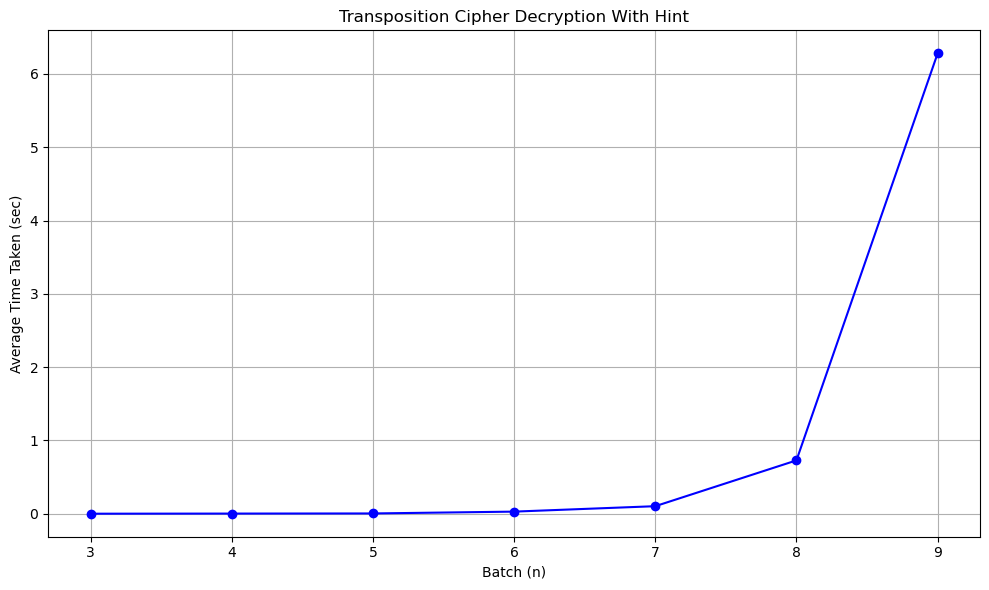

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('transposition_times_with_hint.xlsx')

print(df)

plt.figure(figsize=(10, 6))
plt.plot(df['작업 단위(batch)'], df['평균 소요 시간(초)'], marker='o', linestyle='-', color='b')

plt.title('Transposition Cipher Decryption With Hint')
plt.xlabel('Batch (n)')
plt.ylabel('Average Time Taken (sec)')
plt.grid(True)
plt.xticks(df['작업 단위(batch)'])
plt.tight_layout()
plt.show()
